In [1]:
from QPCA.decomposition.Qpca import QPCA
import numpy as np
from qiskit import QuantumRegister, ClassicalRegister, QuantumCircuit
from qiskit import Aer, transpile, execute,assemble
from qiskit.visualization import plot_bloch_multivector,plot_histogram,array_to_latex
import matplotlib.pyplot as plt
import random
from qiskit.extensions import UnitaryGate
from QPCA.preprocessingUtilities.preprocessing_matrix_utilities import generate_matrix
from QPCA.quantumUtilities.quantum_utilities import thetas_computation,from_binary_tree_to_qcircuit,state_vector_tomography

# General use case of tomography 

Here we show that our tomography implementation can be used in general to estimate any quantum circuit' statevectors.

In [2]:
qc=QuantumCircuit(2)
qc.x(0)
qc.h(0)
qc.h(1)

qc.draw()

┌───┐┌───┐
q_0: ┤ X ├┤ H ├
     ├───┤└───┘
q_1: ┤ H ├─────
     └───┘

In [4]:
aer=Aer.get_backend('statevector_simulator')
statevector=aer.run(transpile(qc,aer)).result().get_statevector()
array_to_latex(statevector)

<IPython.core.display.Latex object>

In [6]:
state_vector_tomography(qc,n_shots=8000,qubits_to_be_measured=[0])

{'0': 0.7075485849042453, '1': -0.7066647012551285}

We can specify the qubits that you want to reconstruct (or measure) and if drawing the circuit that implements the tomography

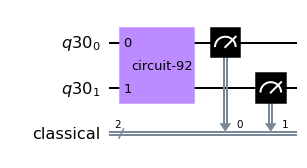

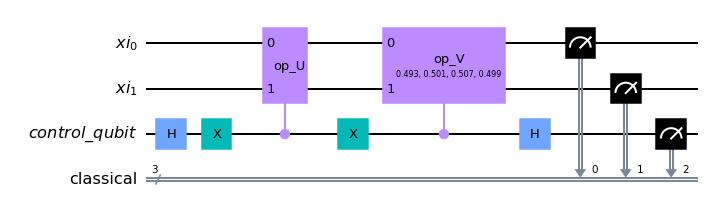

{'00': 0.4930770730829005,
 '01': -0.501373114556415,
 '10': 0.50658168146904,
 '11': -0.4988737315193094}

In [7]:
state_vector_tomography(qc,n_shots=8000,drawing_amplitude_circuit=True,drawing_sign_circuit=True)

# Qpca class usability

In [2]:
resolution=8
matrix_dimension=3
lista=list(range(0,2**resolution))
eigenvalues_list=[0.65,0.25,0.06,0.04]


In [3]:
#4747
seed=19
input_matrix=generate_matrix(matrix_dimension=matrix_dimension,replicate_paper=False,seed=seed)#,eigenvalues_list=eigenvalues_list)

Matrix:
 [[0.65 0.29 0.92]
 [0.29 0.14 0.44]
 [0.92 0.44 2.07]]

eigenvalue: 0.007045038872204365 - eigenvector: [ 0.359 -0.933  0.039]
eigenvalue: 0.21492893761037152 - eigenvector: [-0.825 -0.297  0.481]
eigenvalue: 2.6317728594982777 - eigenvector: [-0.437 -0.205 -0.876]


In [4]:
qpca=QPCA().fit(input_matrix,resolution=resolution)

In [5]:
np.linalg.eig(qpca.input_matrix),qpca.input_matrix

((array([0.92221665, 0.07531465, 0.0024687 , 0.        ]),
  array([[-0.43714001, -0.82468914,  0.35888219,  0.        ],
         [-0.2051187 , -0.29709624, -0.93255571,  0.        ],
         [-0.87569112,  0.48127086,  0.03928651,  0.        ],
         [ 0.        ,  0.        ,  0.        ,  1.        ]])),
 array([[0.22776803, 0.10031788, 0.3231667 , 0.        ],
        [0.10031788, 0.04759571, 0.15478991, 0.        ],
        [0.3231667 , 0.15478991, 0.72463626, 0.        ],
        [0.        , 0.        , 0.        , 0.        ]]))

/opt/miniconda3/envs/EAGLE_environment/lib/python3.8/site-packages/numpy/linalg/linalg.py:2154: RuntimeWarning: divide by zero encountered in det
  r = _umath_linalg.det(a, signature=signature)
/opt/miniconda3/envs/EAGLE_environment/lib/python3.8/site-packages/numpy/linalg/linalg.py:2154: RuntimeWarning: invalid value encountered in det
  r = _umath_linalg.det(a, signature=signature)
/Users/tommasofioravanti/Desktop/Intesa/Quantum/Esperimenti/QuPCA/QPCA/postprocessingUtilities/postprocessing_eig_reconstruction.py:84: RuntimeWarning: invalid value encountered in divide
  scaled_statevectors.append(statevector[i:i+len_input_matrix]/max_list[e])


(array([0.921875  , 0.00390625, 0.07421875]),
 array([[ 0.43142806, -0.35735004,  0.83494356],
        [ 0.20596829,  0.92456083,  0.29541018],
        [ 0.85362861, -0.03957747, -0.4871319 ]]))

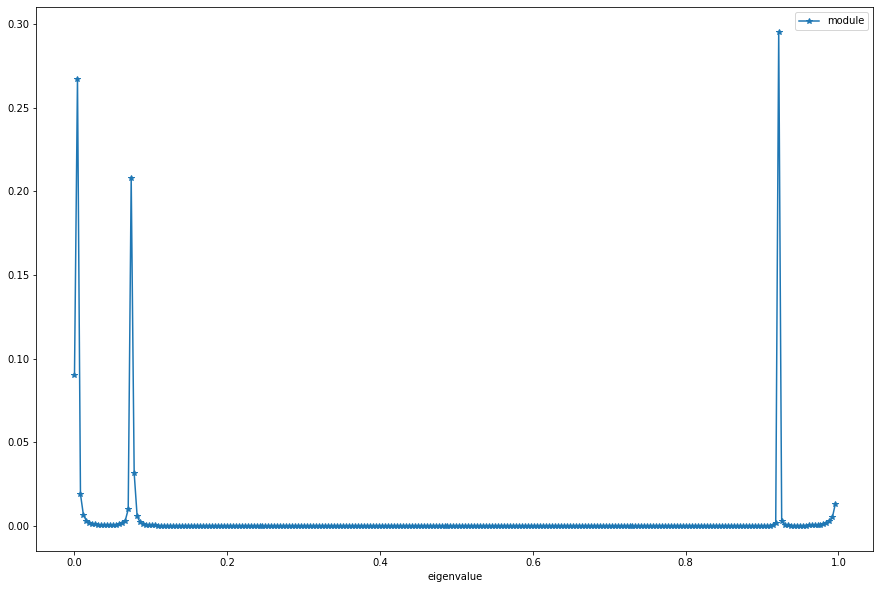

In [6]:
qpca.eigenvectors_reconstruction(n_shots=1000000,n_repetitions=1,plot_peaks=True)

In [7]:
qpca.quantum_input_matrix_reconstruction()

array([[0.63874773, 0.28233201, 0.88288061],
       [0.28233201, 0.13961847, 0.43166107],
       [0.88288061, 0.43166107, 1.96729196]])

In [8]:
qpca.true_input_matrix,np.linalg.eig(qpca.input_matrix)

(array([[0.6499923 , 0.28628183, 0.92223594],
        [0.28628183, 0.13582612, 0.44173122],
        [0.92223594, 0.44173122, 2.06792842]]),
 (array([0.92221665, 0.07531465, 0.0024687 , 0.        ]),
  array([[-0.43714001, -0.82468914,  0.35888219,  0.        ],
         [-0.2051187 , -0.29709624, -0.93255571,  0.        ],
         [-0.87569112,  0.48127086,  0.03928651,  0.        ],
         [ 0.        ,  0.        ,  0.        ,  1.        ]])))